# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp


# Notes
- we used the GPT2 model
- we used the GPT2 tokenizer with this settings 
  - use_fast=True
  - add_prefix_space=False
- in this case we used all the tokens that are numbers in the tokenizer for ASMR and GPT2
- using the floatingPointPartitioner for ASMR
- We use max_tokens = 4 while sampling with the LLM because the eos token probability is very low, causing the model to generate very long sequences (lot of time and maybe wont stop)
- We dont use a max_length

In [9]:
asmr_data = pd.read_csv('../csv/asmr/asmr_10k_all_tokens.csv')
outlines_data = pd.read_csv('../csv/outlines/outlines_10k.csv')
llm_data = pd.read_csv('../csv/llm/llm_10k_all_tokens.csv')

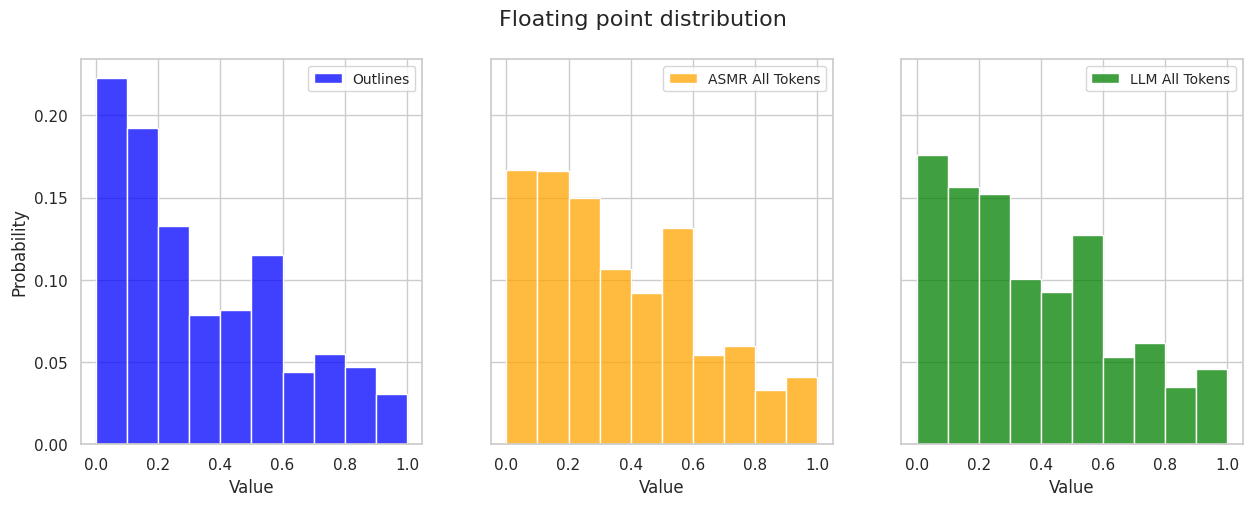

In [10]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.histplot(outlines_data['floating-point'], bins=10, stat='probability', label='Outlines', ax=axs[0], color = 'blue')
sns.histplot(asmr_data['floating-point'], bins=10, stat='probability', label='ASMR All Tokens', ax=axs[1], color='orange')
sns.histplot(llm_data['floating-point'], bins=10, stat='probability', label='LLM All Tokens', ax=axs[2], color='green')


fig.suptitle('Floating point distribution', fontsize=16)
for ax in axs:
    ax.set_xlabel('Value', fontsize=12)
    ax.set_ylabel('Probability', fontsize=12)
    ax.legend(fontsize=10)

plt.show()


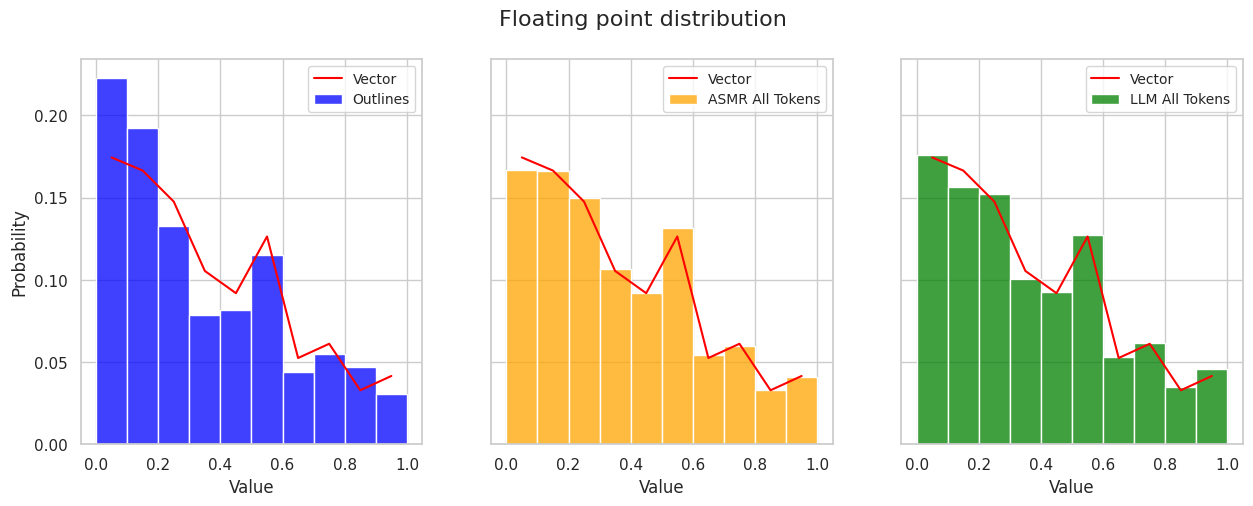

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.histplot(outlines_data['floating-point'], bins=10, stat='probability', label='Outlines', ax=axs[0], color='blue')
sns.histplot(asmr_data['floating-point'], bins=10, stat='probability', label='ASMR All Tokens', ax=axs[1], color='orange')
sns.histplot(llm_data['floating-point'], bins=10, stat='probability', label='LLM All Tokens', ax=axs[2], color='green')

vector = [0.17443846100216148, 0.16645335456934116, 0.14757550357801064, 0.10539550515232039, 0.09187515046691043, 0.12635216414718858, 0.05245560827874188, 0.061106762154436264, 0.03282946250709925, 0.04151802814378992]


for i, ax in enumerate(axs):
    ax.plot([i/10 + 0.05 for i in range(10)], vector, color='red', label='Vector')

fig.suptitle('Floating point distribution', fontsize=16)
for ax in axs:
    ax.set_xlabel('Value', fontsize=12)
    ax.set_ylabel('Probability', fontsize=12)
    ax.legend(fontsize=10)

plt.show()